In [1]:
'''Este é um projeto de análise de dados sobre vendas de uma empresa fictícia, vamos chama-la de Benas.SA
O objetivo é analisar os dados e responder algumas perguntas sobre o desempenho da empresa.
Os dados estão numa planilha em excel em anexo
'''
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


In [2]:
#Agora vamos importar os dados
df = pd.read_excel('Cópia de bd_vendas.xlsx')
df.head()

,ID,Genero,Cidade,UF,Data Venda,Data de Nascimento,Idade,Tipo de Cartão,Data_Validade,Profissão,Produto,Qtde,Preco_compra,Preco_venda
0,47187,F,Americana,SP,2020-09-20,1981-12-26,41,MasterCard,2020-06-14,especialista Inscrição,abre-latas elétrico,1,80,96.0
1,3813,F,Cariacica,ES,2019-02-11,1952-10-14,71,Visa,2019-04-24,intérprete de Medicina,batedeira,1,320,384.0
2,11351,F,Ceilândia,DF,2019-08-13,1950-08-06,73,Visa,2019-12-29,arqueólogo,cafeteira,1,180,216.0
3,31022,F,Contagem,MG,2019-07-24,1950-08-27,73,Visa,2019-10-24,assessor instrucional,fogão,1,700,840.0
4,17530,F,Feira de Santana,BA,2019-07-31,1972-11-12,50,MasterCard,2019-02-20,engenheiro químico,forno,1,640,768.0


In [3]:
#Vamos verificar o tamanho do nosso dataframe
df.shape

(50000, 14)

In [4]:
#Vamos incluir uma coluna com o lucro obtido em cada venda
df['Lucro'] = df['Preco_venda'] - df['Preco_compra']
df.head()

,ID,Genero,Cidade,UF,Data Venda,Data de Nascimento,Idade,Tipo de Cartão,Data_Validade,Profissão,Produto,Qtde,Preco_compra,Preco_venda,Lucro
0,47187,F,Americana,SP,2020-09-20,1981-12-26,41,MasterCard,2020-06-14,especialista Inscrição,abre-latas elétrico,1,80,96.0,16.0
1,3813,F,Cariacica,ES,2019-02-11,1952-10-14,71,Visa,2019-04-24,intérprete de Medicina,batedeira,1,320,384.0,64.0
2,11351,F,Ceilândia,DF,2019-08-13,1950-08-06,73,Visa,2019-12-29,arqueólogo,cafeteira,1,180,216.0,36.0
3,31022,F,Contagem,MG,2019-07-24,1950-08-27,73,Visa,2019-10-24,assessor instrucional,fogão,1,700,840.0,140.0
4,17530,F,Feira de Santana,BA,2019-07-31,1972-11-12,50,MasterCard,2019-02-20,engenheiro químico,forno,1,640,768.0,128.0


In [5]:
#Agora vamos verificar se temos dados faltantes
df.isnull().sum()

ID                    0
Genero                0
Cidade                0
UF                    0
Data Venda            0
Data de Nascimento    0
Idade                 0
Tipo de Cartão        0
Data_Validade         0
Profissão             0
Produto               0
Qtde                  0
Preco_compra          0
Preco_venda           0
Lucro                 0
dtype: int64

In [6]:
#Agora vamos verificar se temos dados duplicados
df.duplicated().sum()

0

In [7]:
#Agora vamos verficar o lucro total da empresa no periodo
df['Lucro'].sum()


5536871.2

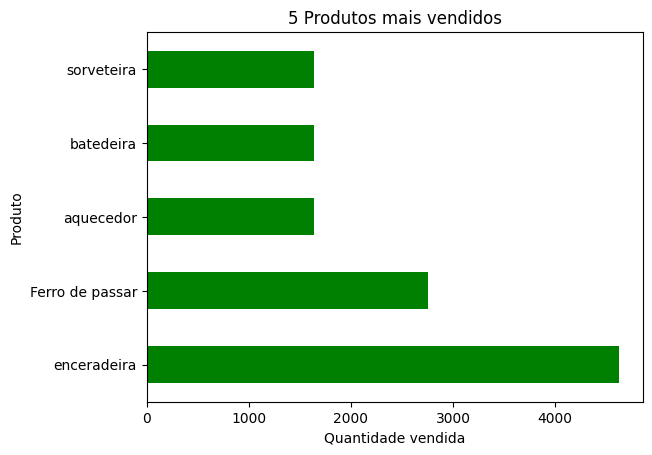

In [8]:
#Agora vamos fazer um grafico com os 5 produtos mais vendidos
df['Produto'].value_counts().head(5).plot(kind='barh', color='green')
plt.title('5 Produtos mais vendidos')
plt.xlabel('Quantidade vendida')
plt.ylabel('Produto')
plt.show()


In [9]:
#Vamos fazer o mesmo grafico usando o plotly grafh objects
fig = go.Figure(data=[go.Bar(y=df['Produto'].value_counts().head(5).index, x=df['Produto'].value_counts().head(5).values, orientation='h')])
fig.update_layout(title='5 Produtos mais vendidos', xaxis_title='Quantidade vendida', yaxis_title='Produto')
fig.show()

In [10]:
#Vamos usar a biblioteca datetime para extrair o mes e o ano de cada venda em conjunto com o pandas
df['Mes'] = pd.DatetimeIndex(df['Data Venda']).month
df['Ano'] = pd.DatetimeIndex(df['Data Venda']).year
df.head()

,ID,Genero,Cidade,UF,Data Venda,Data de Nascimento,Idade,Tipo de Cartão,Data_Validade,Profissão,Produto,Qtde,Preco_compra,Preco_venda,Lucro,Mes,Ano
0,47187,F,Americana,SP,2020-09-20,1981-12-26,41,MasterCard,2020-06-14,especialista Inscrição,abre-latas elétrico,1,80,96.0,16.0,9,2020
1,3813,F,Cariacica,ES,2019-02-11,1952-10-14,71,Visa,2019-04-24,intérprete de Medicina,batedeira,1,320,384.0,64.0,2,2019
2,11351,F,Ceilândia,DF,2019-08-13,1950-08-06,73,Visa,2019-12-29,arqueólogo,cafeteira,1,180,216.0,36.0,8,2019
3,31022,F,Contagem,MG,2019-07-24,1950-08-27,73,Visa,2019-10-24,assessor instrucional,fogão,1,700,840.0,140.0,7,2019
4,17530,F,Feira de Santana,BA,2019-07-31,1972-11-12,50,MasterCard,2019-02-20,engenheiro químico,forno,1,640,768.0,128.0,7,2019


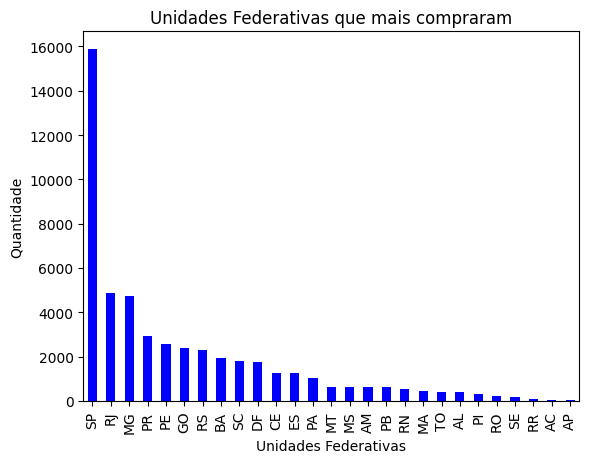

In [11]:
#Agora vamos fazer um grafico com as unidades federativas que mais compraram da empresa,quanto mais quente maior o valor

df['UF'].value_counts().plot(kind='bar', color='blue')
plt.title('Unidades Federativas que mais compraram')
plt.xlabel('Unidades Federativas')
plt.ylabel('Quantidade')
plt.show()

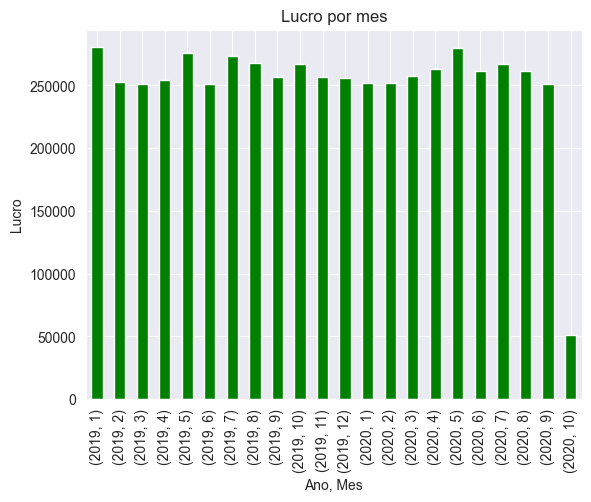

In [19]:
#Agora vamos fazer um grafico com o lucro em 2019 e 2020 em cada mes do ano
df.groupby(['Ano','Mes'])['Lucro'].sum().plot(kind='bar', color='green')
plt.title('Lucro por mes')
plt.xlabel('Ano, Mes')
plt.ylabel('Lucro')
plt.show()

Text(0, 0.5, 'Lucro')

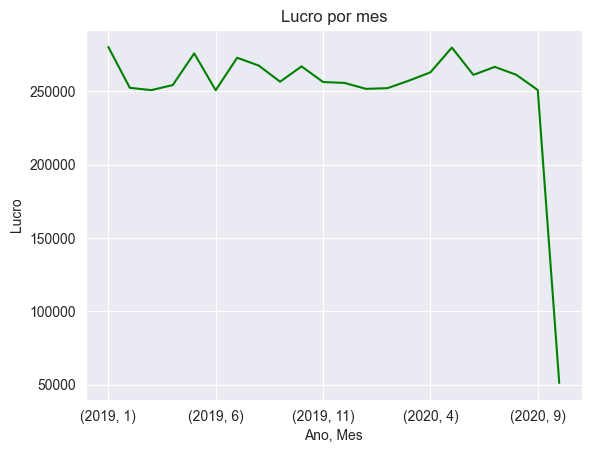

In [21]:
#Agora vamos fazer um grafico de linha com o lucro em 2019 e 2020 em cada mes do ano
df.groupby(['Ano','Mes'])['Lucro'].sum().plot(kind='line', color='green')
plt.title('Lucro por mes')
plt.xlabel('Ano, Mes')
plt.ylabel('Lucro')

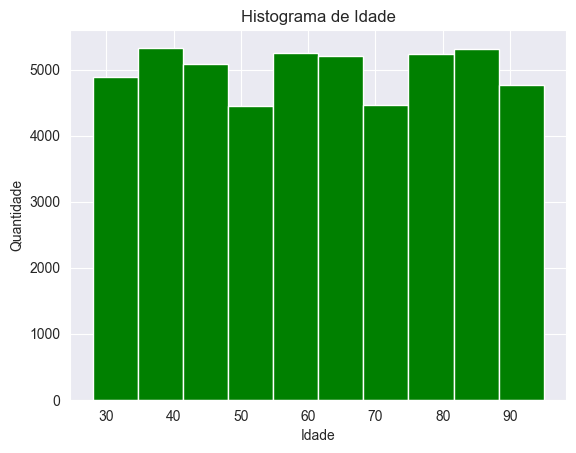

In [23]:
#Agora vamos analisar o publico alvo da empresa
df['Idade'].plot(kind='hist', color='green')
plt.title('Histograma de Idade')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.show()

In [26]:
#Vamos fazer o histograma de idade usano o plotly,por faixas etarias
fig = px.histogram(df, x='Idade', nbins=10, color_discrete_sequence=['green'])
fig.update_layout(title='Histograma de Idade', xaxis_title='Idade', yaxis_title='Quantidade')
fig.show()

In [28]:
#Agora vamos fazer um ranking em dataframe com os 10 clientes que mais compraram da empresa, e os valores que os mesmos gastaram e o quanto a companhia lucrou com eles
df.groupby(['Profissão'])['Lucro'].sum().sort_values(ascending=False).head(10).to_frame()


,Lucro
Profissão,
promotor,9021.8
assistente pessoal,8489.2
trabalhador agrícola,8145.8
enfermeira,7553.4
compositor,7347.6
pedreiro,7151.2
Gerente de relações trabalhistas,6418.2
bilheteiro,6227.8
auxiliar de escritório,6146.0


In [29]:
#Agora vamos ver as 10 profissões que compraram com mais frequencia da empresa
df['Profissão'].value_counts().head(10).to_frame()


,count
Profissão,
promotor,80
trabalhador agrícola,73
pedreiro,71
assistente pessoal,68
enfermeira,67
compositor,59
bilheteiro,54
auxiliar de enfermagem,54
auxiliar de escritório,51


In [32]:
#Por fim vamos ver as filiais que mais venderam
df['Cidade'].value_counts().head(10).to_frame()


,count
Cidade,
São Paulo,3809
Rio de Janeiro,1698
Salvador,1170
Belo Horizonte,1022
Fortaleza,995
Goiânia,949
Recife,821
Campinas,759
Curitiba,668
